<h1 style='font-family:georgia;text-align:center'><i>3. Develop a new model of BPNN capable of tackling a general 
    digit recognition task </i></h1>

<h2 style='font-family:georgia'>Import Library</h2>

In [1]:
#2301877590 - Felix Filipi 
#UAS NOMOR 3
#Import libraries
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

<h2 style='font-family:georgia'>Load Data</h2>

In [2]:
#load_digits
ds=load_digits()
attribute=ds.data #define attribute
label=ds.target #define target

In [3]:
label.shape

(1797,)

<h2 style='font-family:georgia'>Split train & test</h2>

In [4]:
#split training 0.8 & test 0.2
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(attribute,label,test_size=0.2,random_state=42)

In [5]:
#every pixel have a value 0 to 255, so we should normalize by divide with 255
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
#check shape, so we can define input_shape
X_train.shape

(1437, 64)

<h2 style='font-family:georgia'>Model</h2>

In [7]:
#Build MLP model
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=(64,),activation='relu'), #input layer
    tf.keras.layers.Dense(20, activation='relu'), #1th hidden layer
    tf.keras.layers.Dense(20, activation='relu'), #2nd hidden layer
    tf.keras.layers.Dense(10, activation='softmax') #output layer
])
#multi target, then use sparse_categorical_crossentropy
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=50,validation_split=0.2) 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 1149 samples, validate on 288 samples
Epoch 1/50
1149/1149 [==============================] - 3s 3ms/sample - loss: 2.3000 - acc: 0.1253 - val_loss: 2.2957 - val_acc: 0.2014
Epoch 2/50
1149/1149 [==============================] - 0s 157us/sample - loss: 2.2861 - acc: 0.2411 - val_loss: 2.2770 - val_acc: 0.2326
Epoch 3/50
1149/1149 [==============================] - 0s 160us/sample - loss: 2.2538 - acc: 0.2646 - val_loss: 2.2264 - val_acc: 0.2986
Epoch 4/50
1149/1149 [==============================] - 0s 152us/sample - loss: 2.1822 - acc: 0.2959 - val_loss: 2.1200 - val_acc: 0.2431
Epoch 5/50
1149/1149 [==============================] - 0s 151us/sample - loss: 2.0556 - acc: 0.2681 - val_loss: 1.9600 - val_acc: 0.3056
Epoch 6/50
1149/1149 [==============================] - 0s 151us/sample - loss: 1.8965 - acc: 0.3525 - val_loss: 1.7847 - val_acc: 0.4028
Epoch 7/50
1149/1149 [========================

<h2 style='font-family:georgia'>Training & Validation Accuracy Curves</h2>

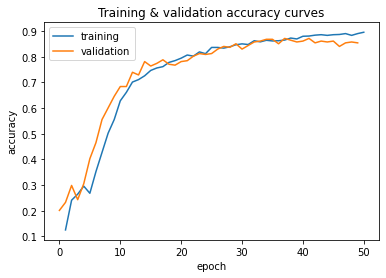

In [8]:
#training and validation accuracy curves
epochs = range(1, len(history.history['acc'])+1)
plt.plot(epochs,history.history['acc'],history.history['val_acc'])
plt.title('Training & validation accuracy curves')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'])
plt.show()

<h2 style='font-family:georgia'>Evaluate</h2>

In [9]:
#testing
_, accuracy = model.evaluate(X_test, y_test) 
print('Accuracy: %.2f%%' % (accuracy*100)) #testing accuracy

360/360 [==============================] - 0s 111us/sample - loss: 0.4286 - acc: 0.8667
Accuracy: 86.67%


In [10]:
# make class predictions with the model
predictions = model.predict_classes(X_test)
# summarize the first 5 cases
for i in range(5):
    print('%s => %d (expected %d)' % (X_test[i], y_test[i], predictions[i]))

[0.         0.         0.         0.02745098 0.04705882 0.
 0.         0.         0.         0.         0.01568627 0.0627451
 0.03137255 0.         0.         0.         0.         0.
 0.04705882 0.04313725 0.         0.         0.         0.
 0.         0.         0.05882353 0.03921569 0.03137255 0.02352941
 0.00392157 0.         0.         0.         0.05882353 0.0627451
 0.03137255 0.03921569 0.03137255 0.         0.         0.
 0.05490196 0.02745098 0.         0.         0.04705882 0.
 0.         0.         0.03137255 0.04313725 0.         0.01960784
 0.0627451  0.00784314 0.         0.         0.         0.03529412
 0.05490196 0.05490196 0.01960784 0.        ] => 6 (expected 6)
[0.         0.         0.04313725 0.0627451  0.03137255 0.
 0.         0.         0.         0.02352941 0.0627451  0.04313725
 0.05098039 0.03529412 0.         0.         0.         0.02745098
 0.0627451  0.         0.03529412 0.0627451  0.         0.
 0.         0.00784314 0.05882353 0.04705882 0.0627451  

<h2 style='font-family:georgia'>Performance analysis (Confusion Matrix)</h2>

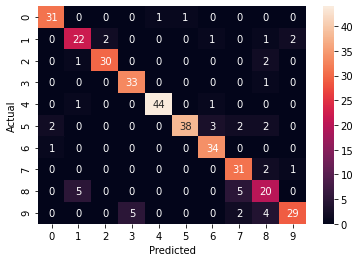

In [11]:
#confusion matrix
confusion_matrix = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()